In [1]:
# Load the extension and set it to autoreload all modules.
%load_ext autoreload
%autoreload 2

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [3]:
from general.spectrogram import SpectrogramLoader
from general.keras import Trainer
from pcgita.dataloader import PcGitaDataLoader
from pcgita.preprocessor import PcGitaPreprocessor
from pcgita.model import PcGitaModel

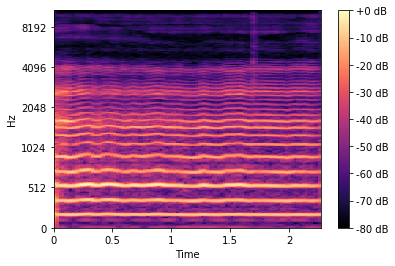

In [4]:
spectrogram_loader = SpectrogramLoader()

S = spectrogram_loader.load_spectrogram('../../k_fold_by_vowels/A/k_0/test/0/0004/AVPEPUDEAC0004a2.wav')
librosa.display.specshow(S, sr=spectrogram_loader.config["sr"], hop_length=spectrogram_loader.config["hop_length"], x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');

In [5]:
from general.keras import prepare_session
prepare_session()

data_loader = PcGitaDataLoader(spectrogram_loader)
preprocessor = PcGitaPreprocessor()
trainer = Trainer(PcGitaModel())

histories = []

for i in range(5):
    di = data_loader.load_fold('A', i)
    
    print('Fold {} loaded!'.format(i))
    #print('Train subjects: {} Test subjects: {}'.format(len(fold.X_train), len(fold.X_val)))
    #print('X_train.shape {}'.format(fold.X_train[0][0].shape))
    
    preprocessor.preprocess(di)

    print('Preprocessing: done!')
    #print('Train subjects: {} Test subjects: {}'.format(len(fold.X_train), len(fold.X_val)))

    #print('X_train.shape {}'.format(fold.X_train.shape))
    
    history = trainer.fit_model(di)
    histories.append(history)
    print('Model fit: done!')

Fold 0 loaded!
Preprocessing: done!
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 144 samples, validate on 30 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
144/144 [==============================] - 10s 72ms/sample - loss: 0.9434 - acc: 0.4722 - val_loss: 0.6712 - val_acc: 0.5000
Epoch 2/100
144/144 [==============================] - 1s 6ms/sample - loss: 0.6682 - acc: 0.5972 - val_loss: 0.6941 - val_acc: 0.5667
Epoch 3/100
144/144 [==============================] - 1s 5ms/sample - loss: 0.6103 - acc: 0.6042 - val_loss: 0.7047 - val_acc: 0.6667
Epoch 4/100
144/144 [==============================] - 1s 7ms/sample - loss: 0.6019 - acc: 0.6389 - val_loss: 0.8231 - val_acc: 0.5667
Epoch 5/100
144/144 [==============================] - 1s 5ms/sample - loss: 0.5742 - acc: 0.6389 - val_loss: 0.7437 - val_acc: 0.5333
Epoch 6

Epoch 9/100
129/129 [==============================] - 1s 7ms/sample - loss: 0.5957 - acc: 0.5969 - val_loss: 0.7226 - val_acc: 0.5333
Epoch 10/100
129/129 [==============================] - 1s 11ms/sample - loss: 0.5816 - acc: 0.6047 - val_loss: 0.7191 - val_acc: 0.5333
Epoch 11/100
129/129 [==============================] - 1s 6ms/sample - loss: 0.5574 - acc: 0.6124 - val_loss: 0.8220 - val_acc: 0.5333
Epoch 12/100
129/129 [==============================] - 1s 6ms/sample - loss: 0.5594 - acc: 0.6124 - val_loss: 0.7521 - val_acc: 0.5333
Model fit: done!
Fold 4 loaded!
Preprocessing: done!
Train on 138 samples, validate on 36 samples
Epoch 1/100
138/138 [==============================] - 6s 42ms/sample - loss: 1.4899 - acc: 0.5435 - val_loss: 0.6754 - val_acc: 0.6667
Epoch 2/100
138/138 [==============================] - 1s 7ms/sample - loss: 0.8251 - acc: 0.5725 - val_loss: 0.7565 - val_acc: 0.5833
Epoch 3/100
138/138 [==============================] - 1s 7ms/sample - loss: 0.7063 - a

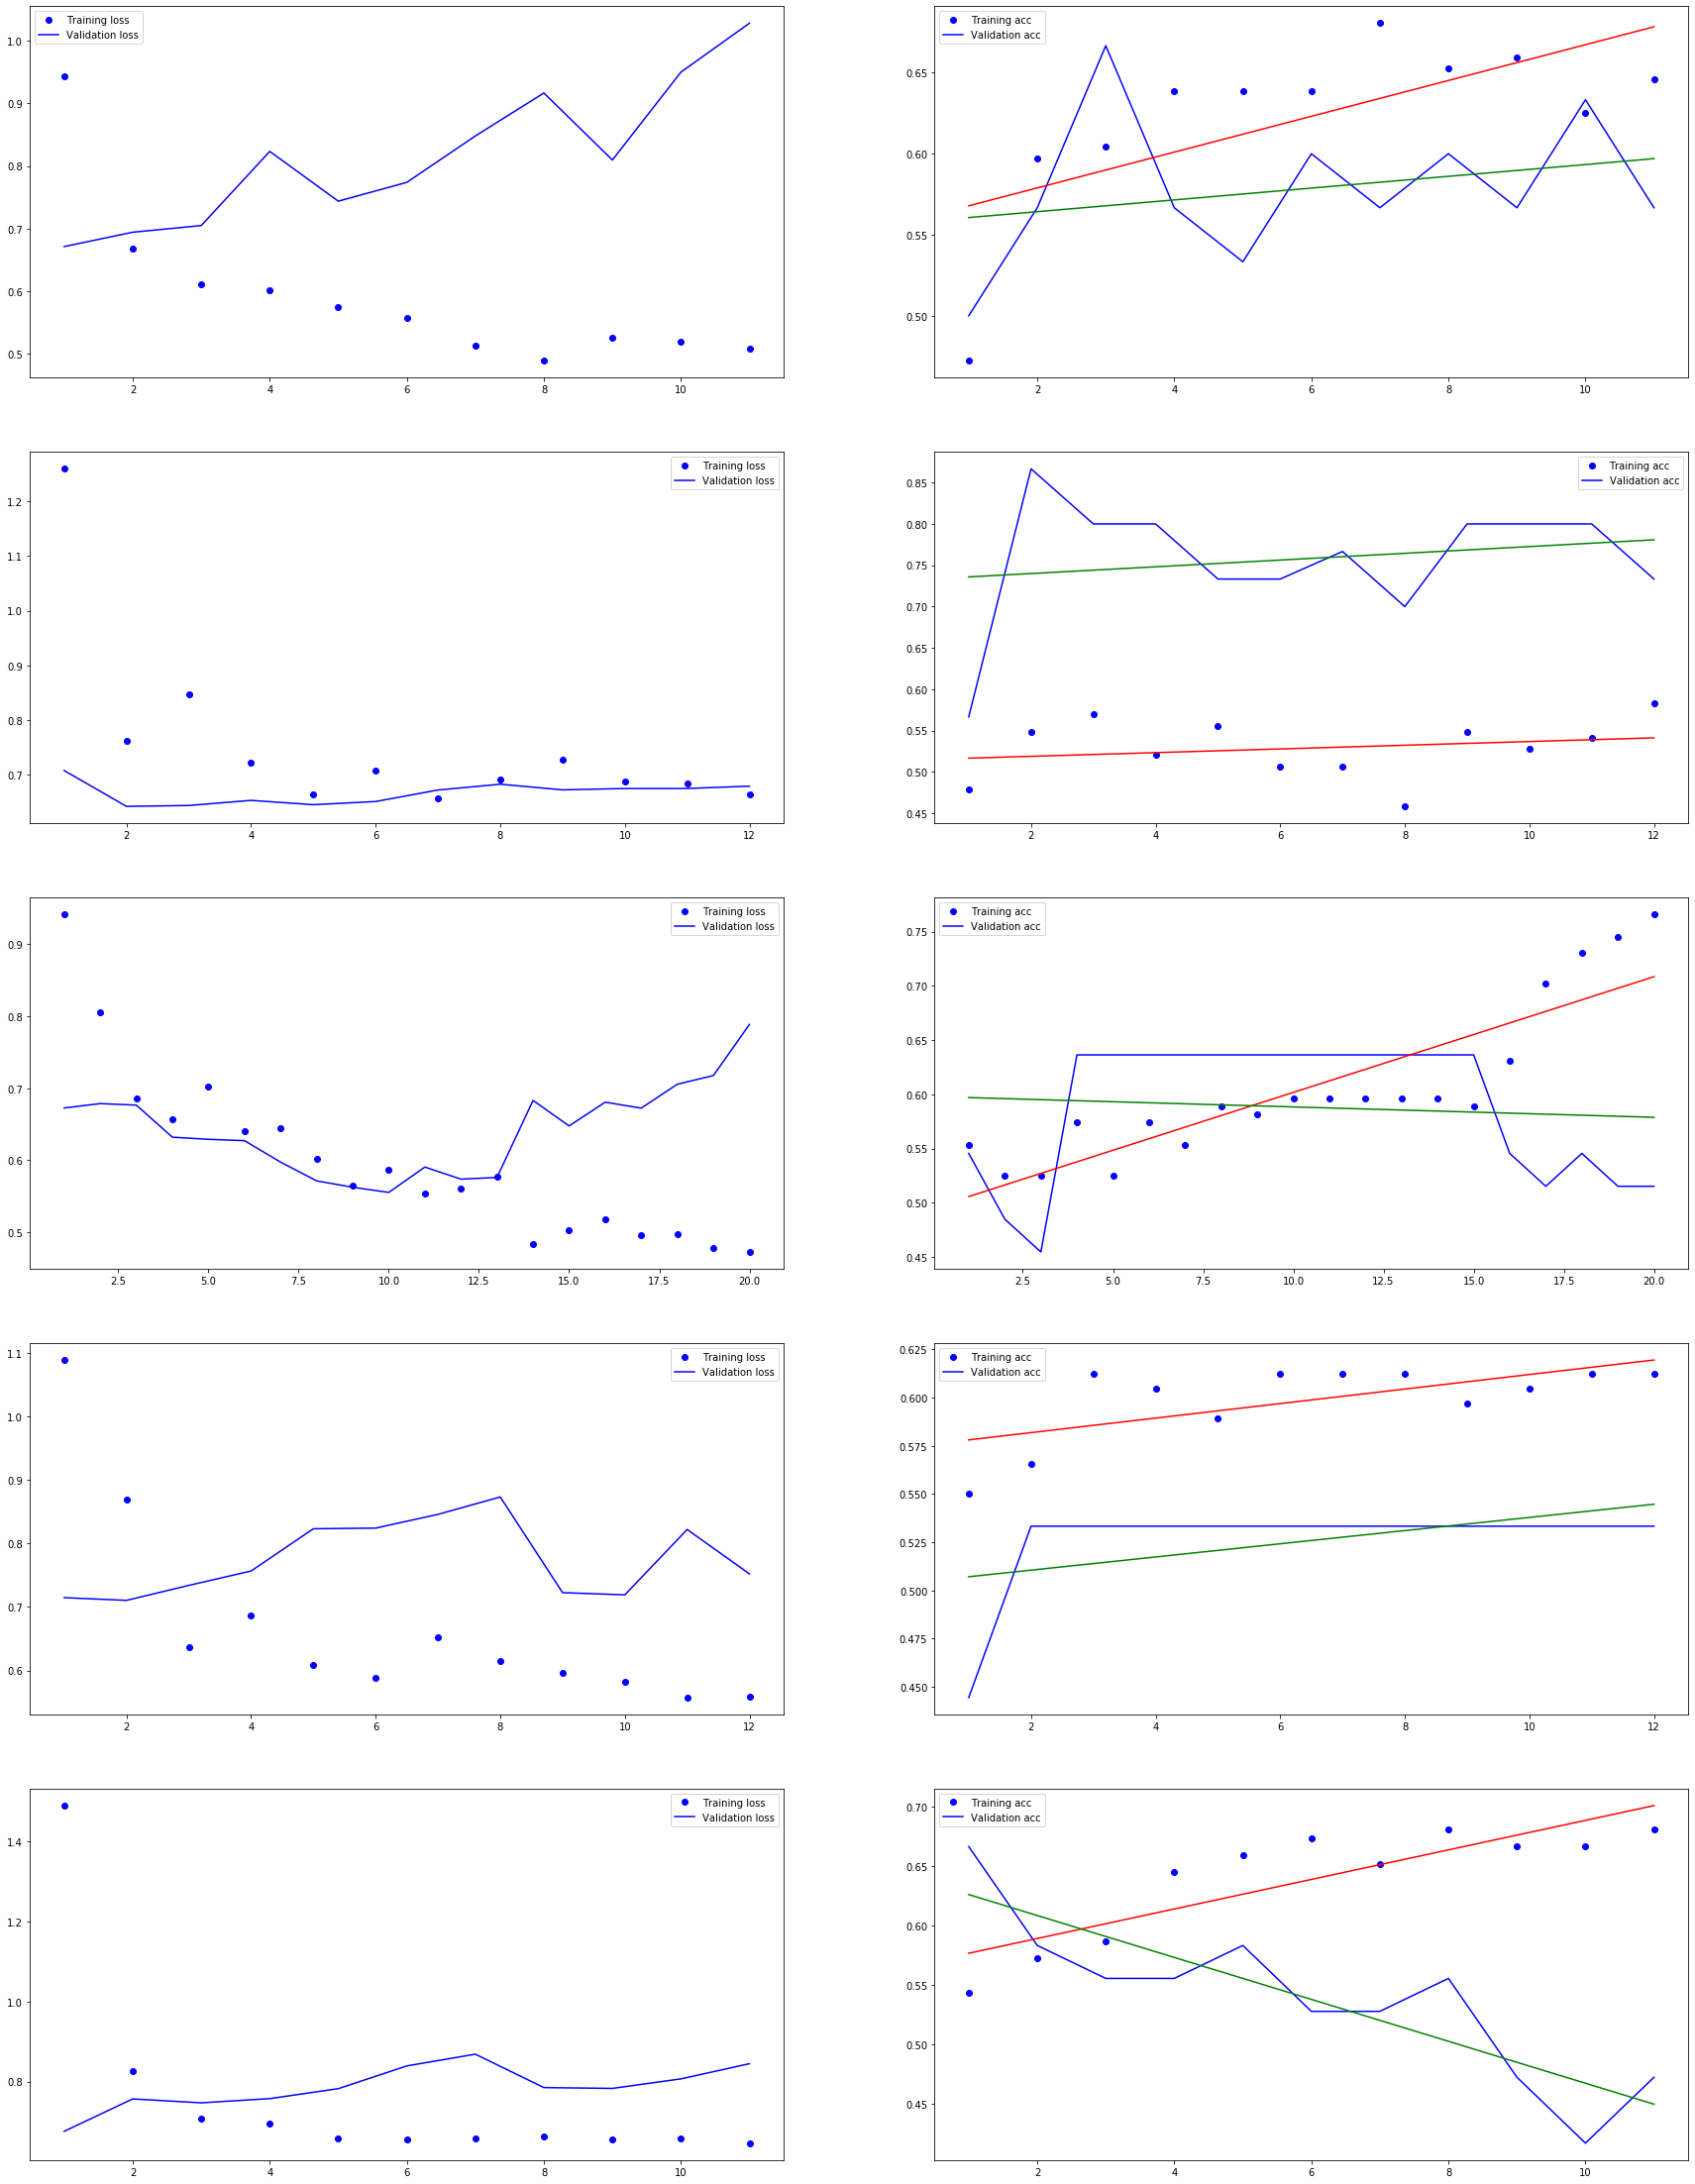

In [7]:
from general.visualization import visualize_history

fig, axs = plt.subplots(nrows=len(histories),ncols=2, figsize=(30, 40))
for i in range(len(histories)):
    visualize_history(fig, axs, i, histories[i])